In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn import neighborssum
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd

from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_validate


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

In [2]:
train_df=pd.read_csv('train.csv',sep='\t')
test_df=pd.read_csv('test.csv',sep='\t')


C:\Users\henm7\AppData\Local\Temp\ipykernel_19220\719454099.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('train.csv',sep='\t')
C:\Users\henm7\AppData\Local\Temp\ipykernel_19220\719454099.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df=pd.read_csv('test.csv',sep='\t')


# Machine Learning


In [3]:
train_1 = train_df.copy()

In [4]:
#elimina filas con valores nulos
train_1.dropna(inplace=True)


In [5]:
train_1.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClaimPeriod', 'TimeInHptal', 'DiagnosisIndex',
       'ProcedureIndex', 'SamePhysician', 'Admitted', 'PotentialFraud', 'DOB',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'Alive',
       'ChronicDiseaseIndex'],
      dtype='object')

In [6]:
obj_list = ['BeneID', 'ClaimID','Provider','AttendingPhysician', 'ClmAdmitDiagnosisCode','OperatingPhysician', 'OtherPhysician','DiagnosisGroupCode','ClmDiagnosisCode_1','SamePhysician']

In [7]:
labelencoder = LabelEncoder()
for col in obj_list:
    train_1[col] = labelencoder.fit_transform(train_1[col])

In [8]:
X = train_1.drop(['PotentialFraud','DOB'],axis=1)
y = train_1['PotentialFraud']

In [9]:
y.value_counts()

PotentialFraud
1    23402
0    17072
Name: count, dtype: int64

El dataset tiene 40474 registros 17072 son normal y 23402 fraude

In [10]:
#balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)


Como el dataset está desequilibrado, con smote se equilibra, se iguala los registros normales y fraudulentos

In [11]:
y_sm.value_counts()

PotentialFraud
1    23402
0    23402
Name: count, dtype: int64

Ahora el datsaet tiene 46804 registros, 23402 de c\u

In [ ]:
#se divide el datset en train y validación con un 70% y 30% respectivamente

X_train, X_val, y_train, y_val = tts(X_sm, y_sm, test_size=0.3,  random_state=42)
# Checking shape of each set
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((32762, 32), (14042, 32), (32762,), (14042,))

### Random Forest

In [18]:
#random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
#predictions 

RandomForestClassifier()

In [ ]:
#optimiza hyperparametros con GridSearchCV
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

grid_search.best_params_





Fitting 10 folds for each of 32 candidates, totalling 320 fits


{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

El modelo que tiene el mejor desempeño es cuando 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100

In [21]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 6, n_estimators= 100)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [24]:
y_predict = rfc.predict(X_val)

In [ ]:
acc = accuracy_score(y_val, y_predict) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_val, y_predict) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_val,y_predict) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_val, y_predict) 
print("The F1-Score is {}".format(f1)) 
  

The accuracy is 0.6860846033328586
The precision is 0.6534990036338061
The recall is 0.7933684360324463
The F1-Score is 0.7166730942280499


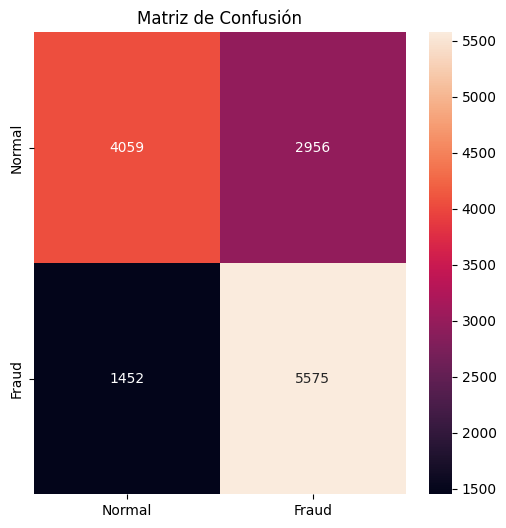

In [80]:
#confusion matrix
LABELS = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_val, y_predict)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");
plt.title("Matriz de Confusión")
plt.show()



In [ ]:
#kfold cross validation

kfold = KFold(n_splits=20,shuffle=True, random_state=42)

# Métricas
scoring = ['accuracy', 'f1', 'precision', 'recall']

# Cross-validation
results = cross_validate(rfc, X_val, y_val, cv=kfold, scoring=scoring)


Cross validation evalua el modelo en multiples ocasiones, para esto divide el conjunto de validación en 20 subconjuntos y calcula las métricas para cada uno. El resultado es el promedio de las 20 evaluaciones.

In [84]:
#resultados promedio en cross validation
print('accuracy:',results['test_accuracy'].mean())
print('f1:',results['test_f1'].mean())
print('precision:',results['test_precision'].mean())
print('recall:',results['test_recall'].mean())

accuracy: 0.6894321446953027
f1: 0.7224823076177441
precision: 0.6533098639286525
recall: 0.808987335267758


## XGBoost

In [41]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [42]:
xgb_model = xgb.XGBClassifier(tree_method='hist',device="cuda")  # Configurar para usar GPU
param_grid = {'max_depth': [3, 6, 9], 'n_estimators': [50, 100, 200]}
xgb_cv = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=5)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [43]:
#Muestra el mejor modelo
xgb_cv.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Mejores hiperparámetros max_depth=9, n_estimators=200

In [44]:
#predictions
y_predict5 = xgb_cv.predict(X_val)

Resultado en conjunto de validación

In [66]:
acc = accuracy_score(y_val, y_predict5) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_val, y_predict5) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_val,y_predict5) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_val, y_predict5) 
print("The F1-Score is {}".format(f1)) 

The accuracy is 0.9228030195128899
The precision is 0.9219082777225615
The recall is 0.9240074000284616
The F1-Score is 0.922956645344705


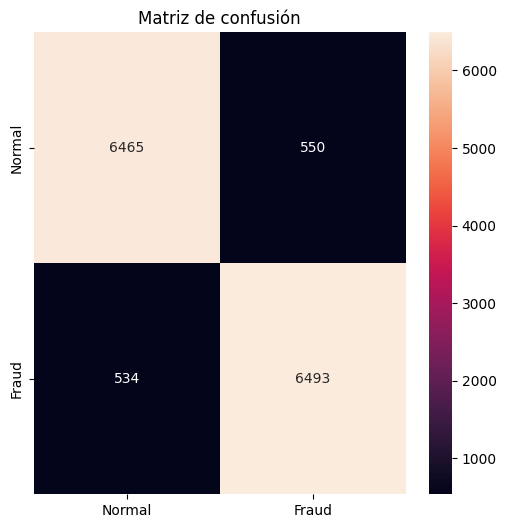

In [79]:
#confusion matrix
LABELS = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(y_val, y_predict5)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d");
plt.title("Matriz de confusión")
plt.show()

In [49]:
(6465+6493)/(6465+550+534+6493)

0.9228030195128899

In [59]:
# Métricas
scoring = ['accuracy', 'f1', 'precision', 'recall']

# Cross-validation
results1 = cross_validate(xgb_cv, X_val, y_val, cv=kfold, scoring=scoring)

In [83]:
#resultados promedio en cross validation
print('accuracy:',results1['test_accuracy'].mean())
print('f1:',results1['test_f1'].mean())
print('precision:',results1['test_precision'].mean())
print('recall:',results1['test_recall'].mean())


accuracy: 0.8629115958063325
f1: 0.8640244350487156
precision: 0.856688376323944
recall: 0.8718318375171785


In [72]:
data=pd.read_excel('results.xlsx')

## compara metricas graficamente, mejor desempeño XGBoost

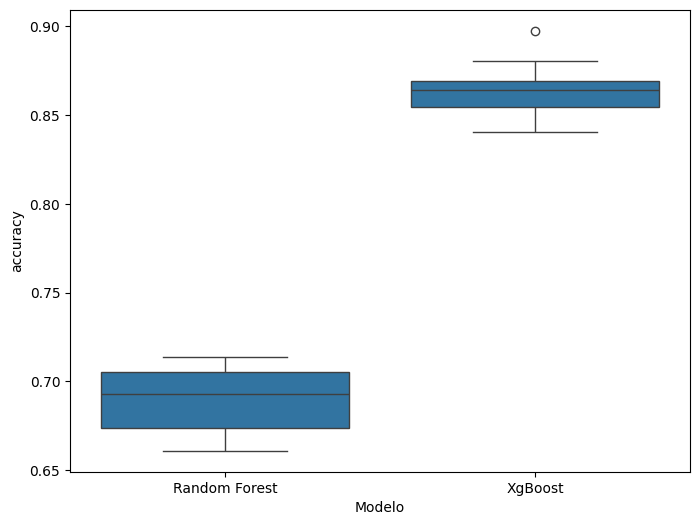

In [ ]:
# Crear boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x="Modelo", y="accuracy", data=data)
plt.ylabel("accuracy")
plt.show()

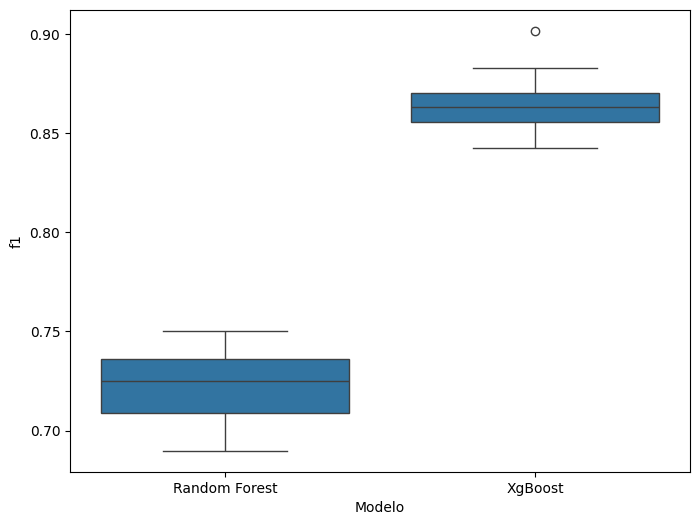

In [76]:
# Crear boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x="Modelo", y="f1", data=data)
plt.ylabel("f1")
plt.show()

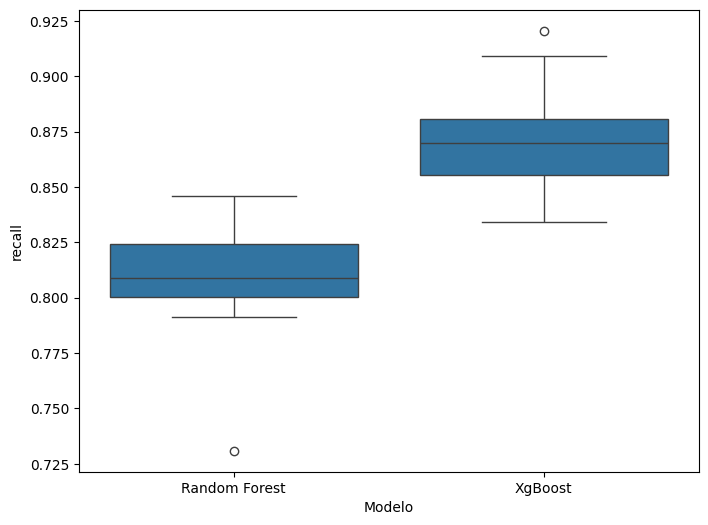

In [77]:
# Crear boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x="Modelo", y="recall", data=data)
plt.ylabel("recall")
plt.show()

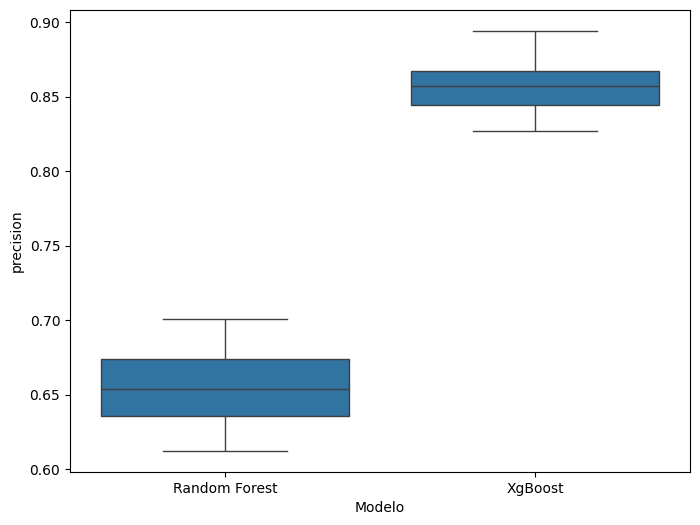

In [78]:
# Crear boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x="Modelo", y="precision", data=data)
plt.ylabel("precision")
plt.show()